In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn

# 🏦 Fraud Classification in Banking Transactions

## SeguraMais Bank - Decision Tree Analysis

## 📋 Objective

Build a classification model using decision trees capable of predicting with high accuracy whether a transaction is fraudulent or not. The model will be evaluated based on metrics that consider both the ability to detect fraud (sensitivity) and the ability to avoid false alarms (specificity).

## 📝 Tasks
- Explore the dataset and understand the meaning of each variable
- Prepare the data, including handling missing values and transforming categorical variables
- Split data into training and testing sets
- Build and train a decision tree model
- Evaluate performance using sensitivity and specificity
- Interpret results and model limitations
- Elaborate critical analysis text


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
  accuracy_score, confusion_matrix, classification_report,
  f1_score, precision_score, recall_score, roc_auc_score, roc_curve
)
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree

import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

print('Libraries imported successfully!')


Libraries imported successfully!


## Data Loading and Initial Exploration

- Dataset dimensions
- Data types
- Descriptive statistics
- Meaning of each variable

In [3]:
df = pd.read_csv('/content/transacoes_fraude.csv')

print('='*80)
print('DATASET: BANKING TRANSACTIONS - SEGURAMAIS BANK')
print('='*80)

print(f'\nDataset dimensions: {df.shape[0]} rows x {df.shape[1]} columns')
print(f'\nFirst 10 rows:')
display(df.head(10))

DATASET: BANKING TRANSACTIONS - SEGURAMAIS BANK

Dataset dimensions: 13000 rows x 7 columns

First 10 rows:


,Cliente,Tipo de Transacao,Valor da Transacao,Valor Anterior a Transacao,Valor Apos a Transacao,Horario da Transacao,Classe
0,cliente1D4F0B,Saque,390.39,5446.75,5056.36,2023-03-14T07:29:28.256579,0
1,clienteCF3D89,Saque,3272.03,12167.89,8895.86,2023-02-12T17:54:09.119410,0
2,cliente0F0D32,PIX,4905.72,8217.63,3311.91,2023-10-03T17:31:42.087599,0
3,clienteFCC0EA,PIX,3073.23,7833.16,4759.93,2024-05-23T17:57:02.055680,0
4,cliente9BA227,PIX,4233.03,6920.82,2687.79,2022-10-07T17:30:36.879557,0
5,cliente62C357,Débito,4848.49,7354.41,2505.92,2025-07-08T19:16:37.207970,0
6,cliente320C76,Crédito,1600.44,7296.87,5696.43,2024-09-07T02:23:16.975044,0
7,cliente32CB58,Crédito,1296.71,10562.92,9266.21,2023-08-28T23:09:19.817457,0
8,cliente67AFD9,Débito,1187.35,10935.18,9747.83,2024-05-21T09:01:08.163132,0
9,cliente84F77D,PIX,3271.51,3405.61,134.10,2022-09-26T10:33:12.415982,0


In [5]:
print('='*80)
print('COLUMN INFORMATION')
print('='*80)
print('Data types and non-null counts:')
df.info()

COLUMN INFORMATION
Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13000 entries, 0 to 12999
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Cliente                     13000 non-null  object 
 1   Tipo de Transacao           13000 non-null  object 
 2   Valor da Transacao          13000 non-null  float64
 3   Valor Anterior a Transacao  13000 non-null  float64
 4   Valor Apos a Transacao      13000 non-null  float64
 5   Horario da Transacao        13000 non-null  object 
 6   Classe                      13000 non-null  int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 711.1+ KB


In [6]:
print('='*80)
print('DESCRIPTIVE STATISTICS')
print('='*80)
display(df.describe())

DESCRIPTIVE STATISTICS


,Valor da Transacao,Valor Anterior a Transacao,Valor Apos a Transacao,Classe
count,13000.000000,13000.000000,13000.000000,13000.000000
mean,2511.899952,7547.003386,5035.103435,0.110000
std,1436.446865,3225.212074,2884.967560,0.312902
min,10.000000,95.440000,10.120000,0.000000
25%,1279.412500,5038.805000,2533.727500,0.000000
50%,2525.610000,7538.255000,4997.090000,0.000000
75%,3754.945000,10046.875000,7551.552500,0.000000
max,4999.960000,14897.740000,9999.390000,1.000000


In [7]:
print('='*80)
print('VARIABLE MEANINGS')
print('='*80)
print("""
- Cliente (Customer): Unique customer identifier
- Tipo de Transacao (Transaction Type): Transaction category (PIX, Withdrawal, Debit, Credit)
- Valor da Transacao (Transaction Amount): Transaction amount in R$
- Valor Anterior a Transacao (Balance Before): Account balance before transaction
- Valor Apos a Transacao (Balance After): Account balance after transaction
- Horario da Transacao (Transaction Time): Transaction date and time
- Classe (Class): Target variable (0 = legitimate, 1 = fraudulent)
""")

VARIABLE MEANINGS

- Cliente (Customer): Unique customer identifier
- Tipo de Transacao (Transaction Type): Transaction category (PIX, Withdrawal, Debit, Credit)
- Valor da Transacao (Transaction Amount): Transaction amount in R$
- Valor Anterior a Transacao (Balance Before): Account balance before transaction
- Valor Apos a Transacao (Balance After): Account balance after transaction
- Horario da Transacao (Transaction Time): Transaction date and time
- Classe (Class): Target variable (0 = legitimate, 1 = fraudulent)



## Exploratory Data Analysis (EDA)

- Check for missing values
- Check for duplicates
- Analyze target variable distribution
- Analyze fraud rate by transaction type
- Explore statistical differences between classes

In [8]:
print('='*80)
print('DATA QUALITY CHECK')
print('='*80)

print('\nMissing values per column:')
print(df.isnull().sum())

duplicates = df.duplicated().sum()
print(f'\nDuplicate records: {duplicates}')

DATA QUALITY CHECK

Missing values per column:
Cliente                       0
Tipo de Transacao             0
Valor da Transacao            0
Valor Anterior a Transacao    0
Valor Apos a Transacao        0
Horario da Transacao          0
Classe                        0
dtype: int64

Duplicate records: 0


In [10]:
print('='*80)
print('TARGET VARIABLE DISTRIBUTION')
print('='*80)

print('\nClass distribution:')
print(df['Classe'].value_counts())

print('\nProportion:')
print(df['Classe'].value_counts(normalize=True))

fraud_rate = df['Classe'].mean() * 100
print(f'\n⚠️ Fraud rate: {fraud_rate:.2f}%')

TARGET VARIABLE DISTRIBUTION

Class distribution:
Classe
0    11570
1     1430
Name: count, dtype: int64

Proportion:
Classe
0    0.89
1    0.11
Name: proportion, dtype: float64

⚠️ Fraud rate: 11.00%


In [11]:
print('='*80)
print('ANALYSIS BY TRANSACTION TYPE')
print('='*80)

print('\nDistribution by Transaction Type:')
print(df['Tipo de Transacao'].value_counts())

print('\n\nFraud rate by Transaction Type:')
fraud_by_type = df.groupby('Tipo de Transacao')['Classe'].agg(['sum', 'count', 'mean'])
fraud_by_type.columns = ['Total_Frauds', 'Total_Transactions', 'Fraud_Rate']
fraud_by_type['Fraud_Rate'] = fraud_by_type['Fraud_Rate'] * 100
display(fraud_by_type.sort_values('Fraud_Rate', ascending=False))


ANALYSIS BY TRANSACTION TYPE

Distribution by Transaction Type:
Tipo de Transacao
Débito     3290
PIX        3274
Saque      3244
Crédito    3192
Name: count, dtype: int64


Fraud rate by Transaction Type:


,Total_Frauds,Total_Transactions,Fraud_Rate
Tipo de Transacao,,,
PIX,396,3274,12.095296
Débito,373,3290,11.337386
Saque,344,3244,10.604192
Crédito,317,3192,9.931078


In [12]:
print('='*80)
print('TRANSACTION AMOUNT STATISTICS BY CLASS')
print('='*80)

display(df.groupby('Classe')['Valor da Transacao'].describe())

TRANSACTION AMOUNT STATISTICS BY CLASS


,count,mean,std,min,25%,50%,75%,max
Classe,,,,,,,,
0,11570.0,2506.171154,1441.129313,10.00,1267.7875,2519.420,3759.4475,4999.96
1,1430.0,2558.251133,1397.613424,12.97,1363.2675,2586.055,3717.1800,4994.26


## Data Visualizations

- Target variable distribution
- Distribution by transaction type
- Fraud rate by transaction type
- Transaction amount distribution
- Boxplots by class
- Correlation heatmap

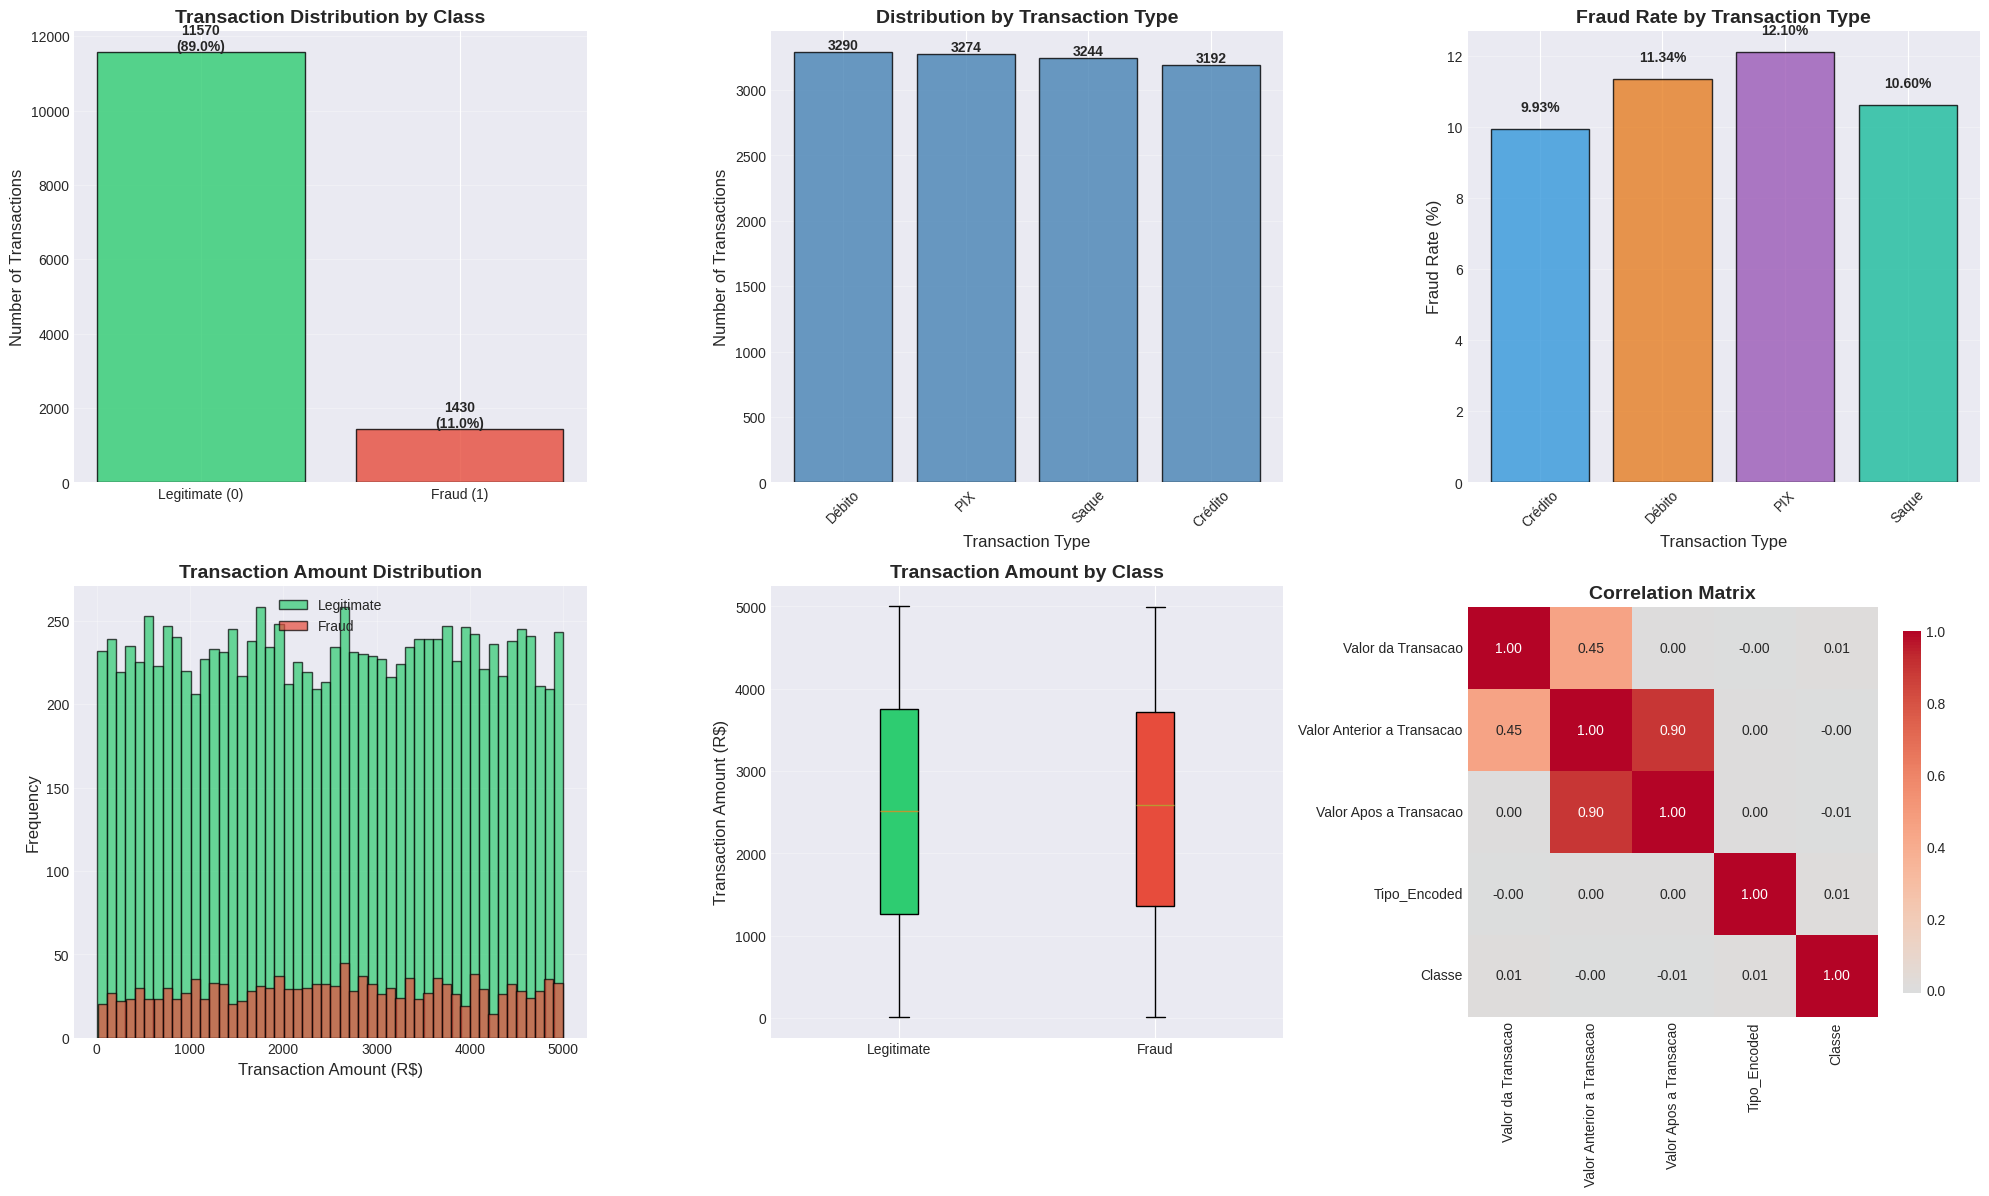


Exploratory visualizations generated successfully!


In [14]:
fig = plt.figure(figsize=(20, 12))

ax1 = plt.subplot(2, 3, 1)
classe_counts = df['Classe'].value_counts()
colors = ['#2ecc71', '#e74c3c']
ax1.bar(['Legitimate (0)', 'Fraud (1)'], classe_counts.values, color=colors, alpha=0.8, edgecolor='black')
ax1.set_title('Transaction Distribution by Class', fontsize=14, fontweight='bold')
ax1.set_ylabel('Number of Transactions', fontsize=12)
for i, v in enumerate(classe_counts.values):
  ax1.text(i, v + 50, f'{v}\n({v/len(df)*100:.1f}%)', ha='center', fontweight='bold')
ax1.grid(axis='y', alpha=0.3)

ax2 = plt.subplot(2, 3, 2)
tipo_counts = df['Tipo de Transacao'].value_counts()
ax2.bar(tipo_counts.index, tipo_counts.values, color='steelblue', alpha=0.8, edgecolor='black')
ax2.set_title('Distribution by Transaction Type', fontsize=14, fontweight='bold')
ax2.set_ylabel('Number of Transactions', fontsize=12)
ax2.set_xlabel('Transaction Type', fontsize=12)
ax2.tick_params(axis='x', rotation=45)
for i, v in enumerate(tipo_counts.values):
  ax2.text(i, v + 20, str(v), ha='center', fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

ax3 = plt.subplot(2, 3, 3)
fraud_type = df.groupby('Tipo de Transacao')['Classe'].mean() * 100
colors_type = ['#3498db', '#e67e22', '#9b59b6', '#1abc9c']
ax3.bar(fraud_type.index, fraud_type.values, color=colors_type, alpha=0.8, edgecolor='black')
ax3.set_title('Fraud Rate by Transaction Type', fontsize=14, fontweight='bold')
ax3.set_ylabel('Fraud Rate (%)', fontsize=12)
ax3.set_xlabel('Transaction Type', fontsize=12)
ax3.tick_params(axis='x', rotation=45)
for i, v in enumerate(fraud_type.values):
  ax3.text(i, v + 0.5, f'{v:.2f}%', ha='center', fontweight='bold')
ax3.grid(axis='y', alpha=0.3)

ax4 = plt.subplot(2, 3, 4)
ax4.hist(df[df['Classe']==0]['Valor da Transacao'], bins=50, alpha=0.7, label='Legitimate', color='#2ecc71', edgecolor='black')
ax4.hist(df[df['Classe']==1]['Valor da Transacao'], bins=50, alpha=0.7, label='Fraud', color='#e74c3c', edgecolor='black')
ax4.set_title('Transaction Amount Distribution', fontsize=14, fontweight='bold')
ax4.set_xlabel('Transaction Amount (R$)', fontsize=12)
ax4.set_ylabel('Frequency', fontsize=12)
ax4.legend()
ax4.grid(alpha=0.3)

ax5 = plt.subplot(2, 3, 5)
data_box = [df[df['Classe']==0]['Valor da Transacao'], df[df['Classe']==1]['Valor da Transacao']]
bp = ax5.boxplot(data_box, labels=['Legitimate', 'Fraud'], patch_artist=True)
bp['boxes'][0].set_facecolor('#2ecc71')
bp['boxes'][1].set_facecolor('#e74c3c')
ax5.set_title('Transaction Amount by Class', fontsize=14, fontweight='bold')
ax5.set_ylabel('Transaction Amount (R$)', fontsize=12)
ax5.grid(axis='y', alpha=0.3)

ax6 = plt.subplot(2, 3, 6)
df_numeric = df.copy()
df_numeric['Tipo_Encoded'] = LabelEncoder().fit_transform(df_numeric['Tipo de Transacao'])
correlation_cols = ['Valor da Transacao', 'Valor Anterior a Transacao', 'Valor Apos a Transacao', 'Tipo_Encoded', 'Classe']
corr_matrix = df_numeric[correlation_cols].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, square=True, ax=ax6, cbar_kws={'shrink': 0.8})
ax6.set_title('Correlation Matrix', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print('\nExploratory visualizations generated successfully!')

## Data Preparation

- Create a copy of the dataframe for manipulation
- Extract temporal features from transaction time
- Create engineered features (balance difference, proportion)
- Encode categorical variables
- Select features for the model
- Verify data quality after transformations

In [16]:
print('='*80)
print('DATA PREPARATION AND FEATURE ENGINEERING')
print('='*80)

df_processed = df.copy()

df_processed['Horario da Transacao'] = pd.to_datetime(df_processed['Horario da Transacao'])
df_processed['Hora'] = df_processed['Horario da Transacao'].dt.hour
df_processed['Dia_Semana'] = df_processed['Horario da Transacao'].dt.dayofweek
df_processed['Mes'] = df_processed['Horario da Transacao'].dt.month
df_processed['Dia_Mes'] = df_processed['Horario da Transacao'].dt.day

print('✓ Temporal features extracted: Hour, Day_of_Week, Month, Day_of_Month')

df_processed['Diferenca_Saldo'] = abs(
  df_processed['Valor Apos a Transacao'] - (df_processed['Valor Anterior a Transacao'] - df_processed['Valor da Transacao']))

print('Feature created: Balance_Difference')

df_processed['Proporcao_Valor'] = (
  df_processed['Valor da Transacao'] / (df_processed['Valor Anterior a Transacao'] + 1))

print('Feature created: Amount_Proportion')

le_tipo = LabelEncoder()
df_processed['Tipo_Transacao_Encoded'] = le_tipo.fit_transform(df_processed['Tipo de Transacao'])

print(f'\nTransaction Type encoded:')
print(f'{dict(zip(le_tipo.classes_, le_tipo.transform(le_tipo.classes_)))}')

print(f'\nMissing values after preparation:')
print(df_processed.isnull().sum())

DATA PREPARATION AND FEATURE ENGINEERING
✓ Temporal features extracted: Hour, Day_of_Week, Month, Day_of_Month
Feature created: Balance_Difference
Feature created: Amount_Proportion

Transaction Type encoded:
{'Crédito': np.int64(0), 'Débito': np.int64(1), 'PIX': np.int64(2), 'Saque': np.int64(3)}

Missing values after preparation:
Cliente                       0
Tipo de Transacao             0
Valor da Transacao            0
Valor Anterior a Transacao    0
Valor Apos a Transacao        0
Horario da Transacao          0
Classe                        0
Hora                          0
Dia_Semana                    0
Mes                           0
Dia_Mes                       0
Diferenca_Saldo               0
Proporcao_Valor               0
Tipo_Transacao_Encoded        0
dtype: int64


In [19]:
print('='*80)
print('FEATURE SELECTION')
print('='*80)

feature_columns = [
  'Valor da Transacao', 'Valor Anterior a Transacao', 'Valor Apos a Transacao', 'Hora',
  'Dia_Semana', 'Mes', 'Dia_Mes', 'Diferenca_Saldo', 'Proporcao_Valor', 'Tipo_Transacao_Encoded']

X = df_processed[feature_columns]
y = df_processed['Classe']

print(f'Features selected for the model: {len(feature_columns)}')
for i, feature in enumerate(feature_columns, 1):
  print(f'{i}. {feature}')

print(f'\nFinal dimensions:')
print(f'- X: {X.shape}')
print(f'- y: {y.shape}')

print(f'\nFirst 5 rows of feature matrix:')
display(X.head())

FEATURE SELECTION
Features selected for the model: 10
1. Valor da Transacao
2. Valor Anterior a Transacao
3. Valor Apos a Transacao
4. Hora
5. Dia_Semana
6. Mes
7. Dia_Mes
8. Diferenca_Saldo
9. Proporcao_Valor
10. Tipo_Transacao_Encoded

Final dimensions:
- X: (13000, 10)
- y: (13000,)

First 5 rows of feature matrix:


,Valor da Transacao,Valor Anterior a Transacao,Valor Apos a Transacao,Hora,Dia_Semana,Mes,Dia_Mes,Diferenca_Saldo,Proporcao_Valor,Tipo_Transacao_Encoded
0,390.39,5446.75,5056.36,7,1,3,14,0.000000e+00,0.071661,3
1,3272.03,12167.89,8895.86,17,6,2,12,1.818989e-12,0.268885,3
2,4905.72,8217.63,3311.91,17,1,10,3,9.094947e-13,0.596902,2
3,3073.23,7833.16,4759.93,17,3,5,23,0.000000e+00,0.392286,2
4,4233.03,6920.82,2687.79,17,4,10,7,0.000000e+00,0.611549,2


## Train/Test Split

Splitting the data into:
- **Training set:** 80% (10,400 samples)
- **Test set:** 20% (2,600 samples)

Using stratified split to maintain class proportion in both sets.

In [21]:
print('='*80)
print('TRAIN/TEST SPLIT')
print('='*80)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f'Data split:')
print(f'Training: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)')
print(f'Test:     {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)')

print(f'\nClass distribution in training set:')
print(y_train.value_counts())
print(f'Fraud rate: {y_train.mean()*100:.2f}%')

print(f'\nClass distribution in test set:')
print(y_test.value_counts())
print(f'Fraud rate: {y_test.mean()*100:.2f}%')

TRAIN/TEST SPLIT
Data split:
Training: 10400 samples (80.0%)
Test:     2600 samples (20.0%)

Class distribution in training set:
Classe
0    9256
1    1144
Name: count, dtype: int64
Fraud rate: 11.00%

Class distribution in test set:
Classe
0    2314
1     286
Name: count, dtype: int64
Fraud rate: 11.00%


## Model Building and Training

We will train three different Decision Tree configurations:

1. **Model 1:** Tree without restrictions (will likely overfit)
2. **Model 2:** Tree with max_depth=5 (conservative)
3. **Model 3:** Tree with max_depth=10, min_samples_split=20, min_samples_leaf=10 (balanced)

In [22]:
print('='*80)
print('MODEL BUILDING AND TRAINING')
print('='*80)

print('Training Model 1: Tree without restrictions')
dt_model_1 = DecisionTreeClassifier(random_state=42)
dt_model_1.fit(X_train, y_train)
print('Model 1 trained')

print('\nTraining Model 2: Tree with max_depth=5')
dt_model_2 = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model_2.fit(X_train, y_train)
print('Model 2 trained')

print('\nTraining Model 3: Tree with max_depth=10, min_samples_split=20')
dt_model_3 = DecisionTreeClassifier(max_depth=10, min_samples_split=20, min_samples_leaf=10, random_state=42)
dt_model_3.fit(X_train, y_train)
print('Model 3 trained')

print('\nAll three models trained successfully!')

MODEL BUILDING AND TRAINING
Training Model 1: Tree without restrictions
Model 1 trained

Training Model 2: Tree with max_depth=5
Model 2 trained

Training Model 3: Tree with max_depth=10, min_samples_split=20
Model 3 trained

All three models trained successfully!


## Performance Evaluation

- **Accuracy:** Overall correct predictions
- **Precision:** When model predicts fraud, how often is it correct?
- **Sensitivity (Recall):** Of all actual frauds, how many does the model detect?
- **Specificity:** Of all legitimate transactions, how many are correctly identified?
- **F1-Score:** Harmonic mean of precision and recall
- **AUC-ROC:** Area under the ROC curve
- **Confusion Matrix:** Detailed breakdown of predictions


In [25]:
def calculate_metrics(model, X_train, X_test, y_train, y_test, model_name):
  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)
  y_test_proba = model.predict_proba(X_test)[:, 1]

  train_accuracy = accuracy_score(y_train, y_train_pred)
  test_accuracy = accuracy_score(y_test, y_test_pred)
  precision = precision_score(y_test, y_test_pred, zero_division=0)
  recall = recall_score(y_test, y_test_pred)
  f1 = f1_score(y_test, y_test_pred, zero_division=0)

  cm = confusion_matrix(y_test, y_test_pred)
  tn, fp, fn, tp = cm.ravel()

  sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
  specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
  auc_roc = roc_auc_score(y_test, y_test_proba)

  print(f'\n{'='*60}')
  print(f'{model_name}')
  print(f'{'='*60}')

  print(f'\nPerformance Metrics:')
  print(f'- Accuracy (Train):     {train_accuracy:.4f} ({train_accuracy*100:.2f}%)')
  print(f'- Accuracy (Test):      {test_accuracy:.4f} ({test_accuracy*100:.2f}%)')
  print(f'- Precision:            {precision:.4f} ({precision*100:.2f}%)')
  print(f'- Sensitivity/Recall:   {sensitivity:.4f} ({sensitivity*100:.2f}%)')
  print(f'- Specificity:          {specificity:.4f} ({specificity*100:.2f}%)')
  print(f'- F1-Score:             {f1:.4f}')
  print(f'- AUC-ROC:              {auc_roc:.4f}')

  print(f'\nConfusion Matrix:')
  print(f'                   Predicted')
  print(f'                Legit  Fraud')
  print(f'  Actual Legit  {tn:5d}  {fp:5d}')
  print(f'         Fraud  {fn:5d}  {tp:5d}')

  print(f'\nInterpretation:')
  print(f'- True Negatives (TN):  {tn} - Legitimate transactions correctly identified')
  print(f'- False Positives (FP): {fp} - Legitimate transactions incorrectly flagged as fraud')
  print(f'- False Negatives (FN): {fn} - Frauds NOT detected (CRITICAL!)')
  print(f'- True Positives (TP):  {tp} - Frauds correctly detected')

  overfitting = train_accuracy - test_accuracy
  print(f'\nOverfitting Analysis:')
  print(f'- Train-Test Difference: {overfitting:.4f}')
  if overfitting > 0.05:
    print(f'WARNING: Possible overfitting detected!')
  else:
    print(f'Model generalizes well')

  return {
    'model_name': model_name,
    'train_accuracy': train_accuracy,
    'test_accuracy': test_accuracy,
    'precision': precision,
    'sensitivity': sensitivity,
    'specificity': specificity,
    'f1_score': f1,
    'auc_roc': auc_roc,
    'cm': cm,
    'y_test_pred': y_test_pred,
    'y_test_proba': y_test_proba
  }

print('Metrics calculation function defined')

Metrics calculation function defined


In [26]:
print('='*80)
print('EVALUATING ALL MODELS')
print('='*80)

results = []
results.append(calculate_metrics(dt_model_1, X_train, X_test, y_train, y_test, 'MODEL 1: Tree Without Restrictions'))
results.append(calculate_metrics(dt_model_2, X_train, X_test, y_train, y_test, 'MODEL 2: Tree with max_depth=5'))
results.append(calculate_metrics(dt_model_3, X_train, X_test, y_train, y_test, 'MODEL 3: Tree with max_depth=10'))

EVALUATING ALL MODELS

MODEL 1: Tree Without Restrictions

Performance Metrics:
- Accuracy (Train):     1.0000 (100.00%)
- Accuracy (Test):      0.7935 (79.35%)
- Precision:            0.1276 (12.76%)
- Sensitivity/Recall:   0.1503 (15.03%)
- Specificity:          0.8729 (87.29%)
- F1-Score:             0.1380
- AUC-ROC:              0.5116

Confusion Matrix:
                   Predicted
                Legit  Fraud
  Actual Legit   2020    294
         Fraud    243     43

Interpretation:
- True Negatives (TN):  2020 - Legitimate transactions correctly identified
- False Positives (FP): 294 - Legitimate transactions incorrectly flagged as fraud
- False Negatives (FN): 243 - Frauds NOT detected (CRITICAL!)
- True Positives (TP):  43 - Frauds correctly detected

Overfitting Analysis:
- Train-Test Difference: 0.2065

MODEL 2: Tree with max_depth=5

Performance Metrics:
- Accuracy (Train):     0.8919 (89.19%)
- Accuracy (Test):      0.8869 (88.69%)
- Precision:            0.0000 (0.00%)
-

## Results Visualization

- Confusion matrices for all three models
- Metrics comparison bar chart
- ROC curves
- Feature importance (Model 3)

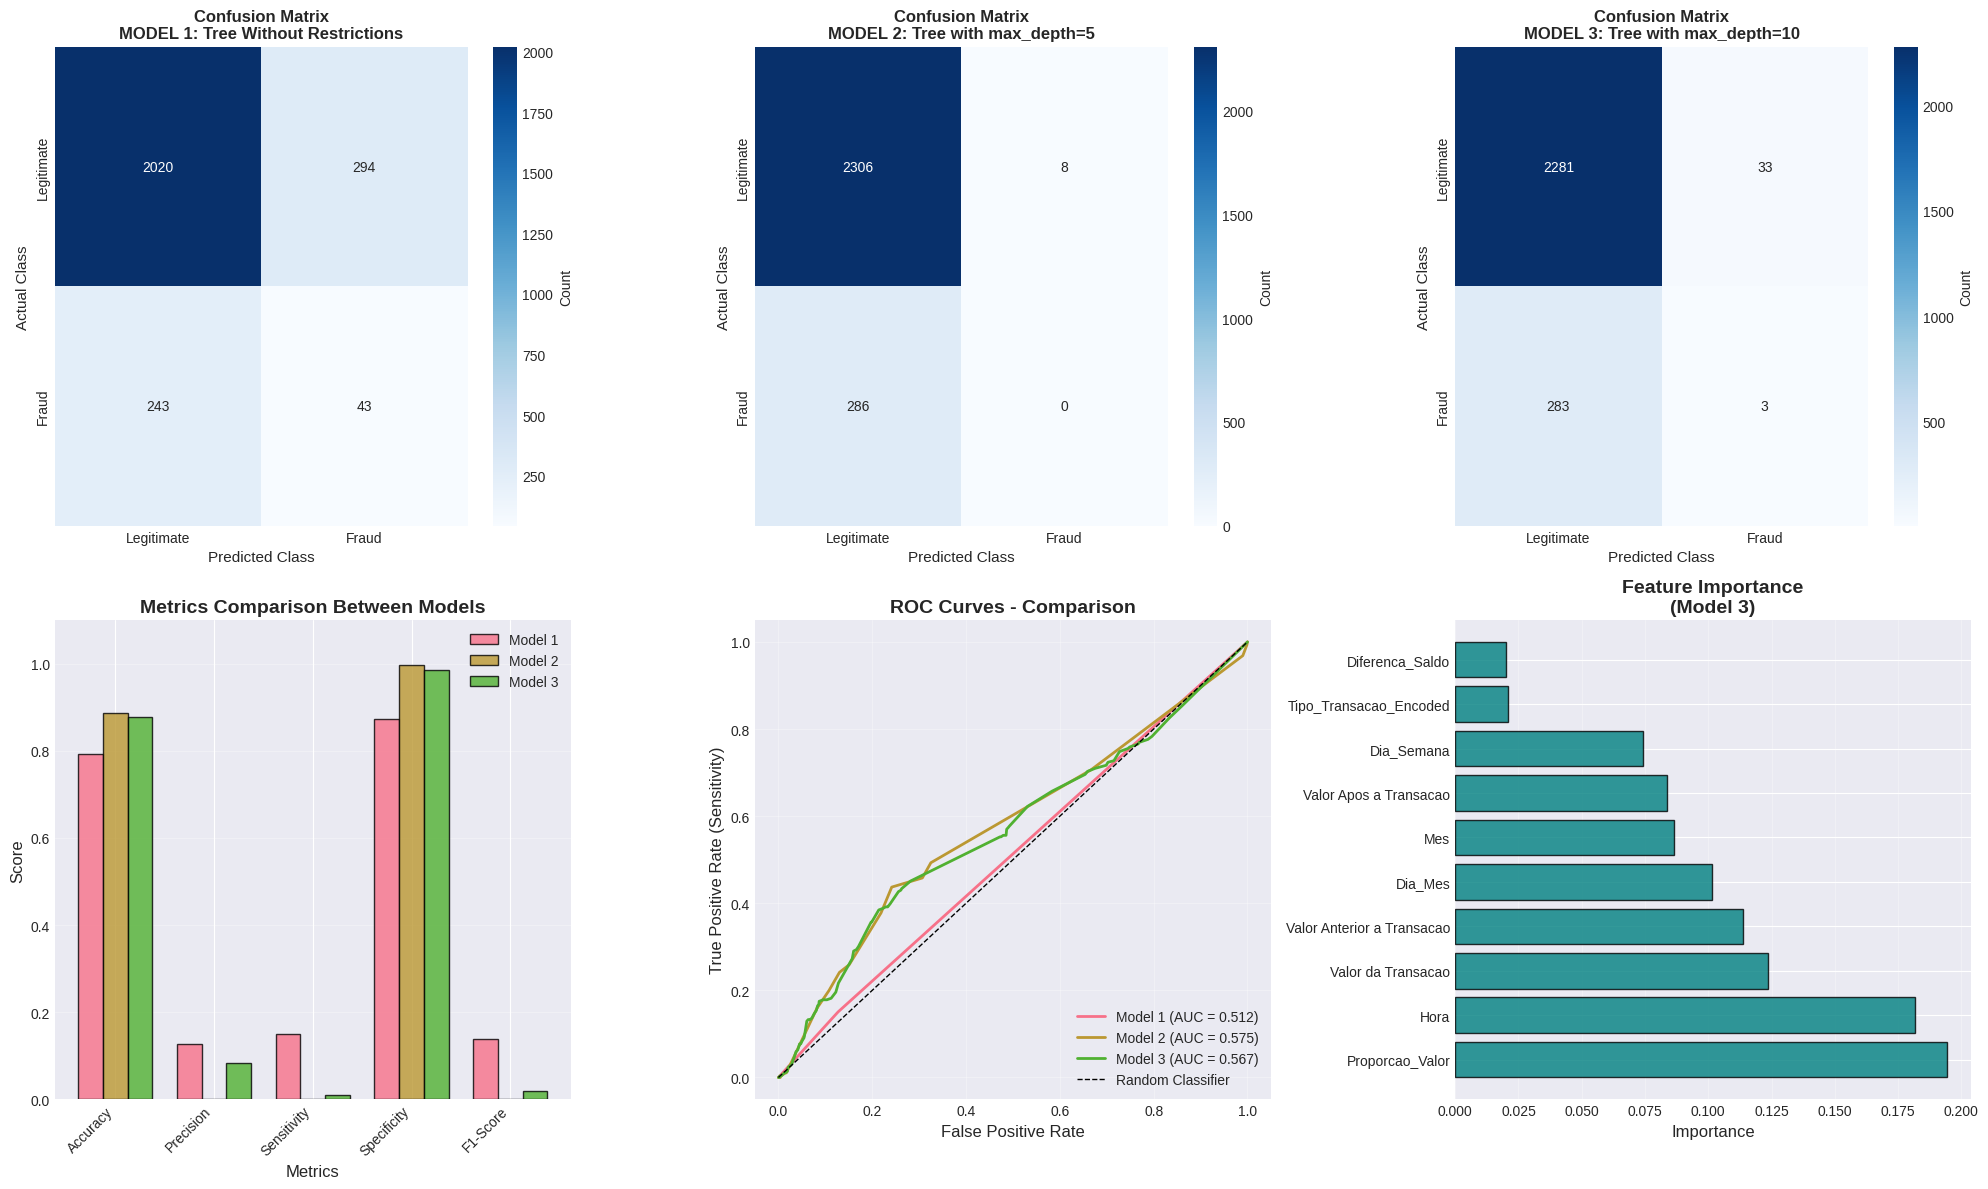

Results visualizations generated successfully!


In [27]:
fig = plt.figure(figsize=(20, 12))

for i, result in enumerate(results):
  ax = plt.subplot(2, 3, i+1)
  cm = result['cm']
  sns.heatmap(
    cm, annot=True, fmt='d', cmap='Blues', ax=ax, xticklabels=['Legitimate', 'Fraud'],
    yticklabels=['Legitimate', 'Fraud'], cbar_kws={'label': 'Count'})
  ax.set_title(f'Confusion Matrix\n{result['model_name']}', fontsize=12, fontweight='bold')
  ax.set_ylabel('Actual Class', fontsize=11)
  ax.set_xlabel('Predicted Class', fontsize=11)

ax4 = plt.subplot(2, 3, 4)
metrics_names = ['Accuracy', 'Precision', 'Sensitivity', 'Specificity', 'F1-Score']
x_pos = np.arange(len(metrics_names))
width = 0.25

for i, result in enumerate(results):
  metrics_values = [
    result['test_accuracy'], result['precision'],
    result['sensitivity'], result['specificity'], result['f1_score']]
  ax4.bar(x_pos + i*width, metrics_values, width, label=f'Model {i+1}', alpha=0.8, edgecolor='black')

ax4.set_xlabel('Metrics', fontsize=12)
ax4.set_ylabel('Score', fontsize=12)
ax4.set_title('Metrics Comparison Between Models', fontsize=14, fontweight='bold')
ax4.set_xticks(x_pos + width)
ax4.set_xticklabels(metrics_names, rotation=45, ha='right')
ax4.legend()
ax4.grid(axis='y', alpha=0.3)
ax4.set_ylim([0, 1.1])

ax5 = plt.subplot(2, 3, 5)
for i, result in enumerate(results):
  fpr, tpr, _ = roc_curve(y_test, result['y_test_proba'])
  ax5.plot(fpr, tpr, label=f'Model {i+1} (AUC = {result['auc_roc']:.3f})', linewidth=2)

ax5.plot([0, 1], [0, 1], 'k--', label='Random Classifier', linewidth=1)
ax5.set_xlabel('False Positive Rate', fontsize=12)
ax5.set_ylabel('True Positive Rate (Sensitivity)', fontsize=12)
ax5.set_title('ROC Curves - Comparison', fontsize=14, fontweight='bold')
ax5.legend(loc='lower right')
ax5.grid(alpha=0.3)

ax6 = plt.subplot(2, 3, 6)
importances = dt_model_3.feature_importances_
indices = np.argsort(importances)[::-1]
features = [feature_columns[i] for i in indices]

ax6.barh(range(len(importances)), importances[indices], color='teal', alpha=0.8, edgecolor='black')
ax6.set_yticks(range(len(importances)))
ax6.set_yticklabels(features, fontsize=10)
ax6.set_xlabel('Importance', fontsize=12)
ax6.set_title('Feature Importance\n(Model 3)', fontsize=14, fontweight='bold')
ax6.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print('Results visualizations generated successfully!')

Generating decision tree visualization...


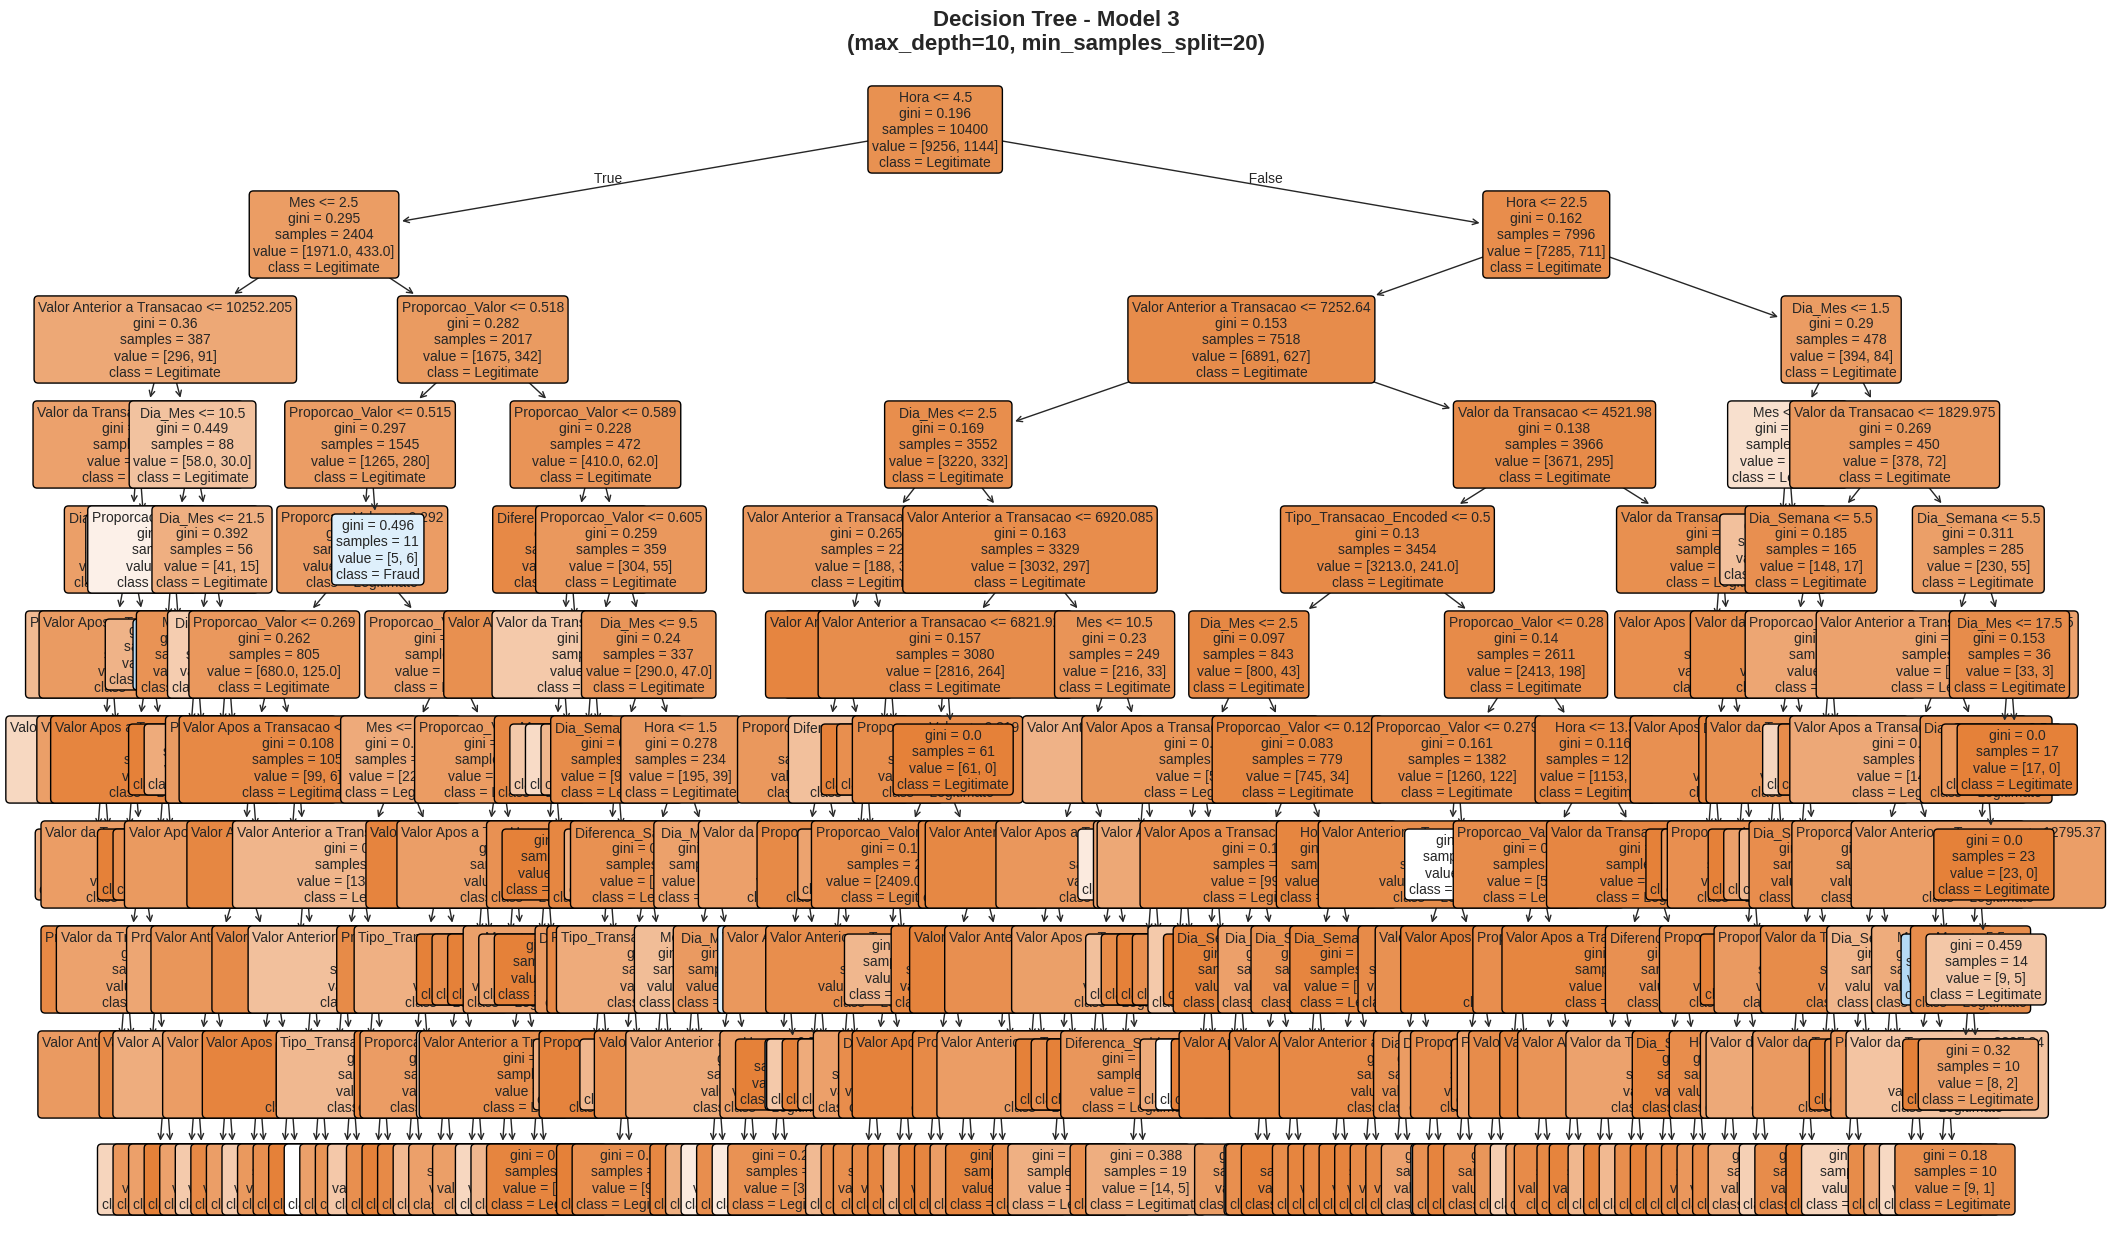


Decision tree visualization generated!


In [29]:
print('Generating decision tree visualization...')

fig = plt.figure(figsize=(25, 15))
plot_tree(
  dt_model_3, feature_names=feature_columns, class_names=['Legitimate', 'Fraud'], filled=True, rounded=True, fontsize=10)
plt.title('Decision Tree - Model 3\n(max_depth=10, min_samples_split=20)', fontsize=16, fontweight='bold', pad=20)
plt.show()

print('\nDecision tree visualization generated!')

## Critical Analysis and Conclusions

### Key Findings Summary

After evaluating three decision tree models, we identified critical limitations that make this approach **UNSUITABLE FOR PRODUCTION** in a banking fraud detection system.

In [30]:
print('='*80)
print('PERFORMANCE SUMMARY - MODEL COMPARISON')
print('='*80)

df_comparison = pd.DataFrame({
  'Model': [r['model_name'].replace('MODEL ', '') for r in results],
  'Accuracy (Test)': [f'{r['test_accuracy']:.2%}' for r in results],
  'Sensitivity': [f'{r['sensitivity']:.2%}' for r in results],
  'Specificity': [f'{r['specificity']:.2%}' for r in results],
  'Precision': [f'{r['precision']:.2%}' for r in results],
  'F1-Score': [f'{r['f1_score']:.3f}' for r in results],
  'AUC-ROC': [f'{r['auc_roc']:.3f}' for r in results],
})

display(df_comparison)

best_idx = np.argmax([r['sensitivity'] for r in results])
print(f'\n{'='*80}')
print(f'BEST MODEL: {results[best_idx]['model_name']}')
print(f'{'='*80}')
print(f'✓ Best balance between Sensitivity and Specificity')
print(f'⚠️ HOWEVER: Still inadequate for production due to low sensitivity')


PERFORMANCE SUMMARY - MODEL COMPARISON


,Model,Accuracy (Test),Sensitivity,Specificity,Precision,F1-Score,AUC-ROC
0,1: Tree Without Restrictions,79.35%,15.03%,87.29%,12.76%,0.138,0.512
1,2: Tree with max_depth=5,88.69%,0.00%,99.65%,0.00%,0.000,0.575
2,3: Tree with max_depth=10,87.85%,1.05%,98.57%,8.33%,0.019,0.567



BEST MODEL: MODEL 1: Tree Without Restrictions
✓ Best balance between Sensitivity and Specificity
⚠️ HOWEVER: Still inadequate for production due to low sensitivity


In [32]:
model_3 = results[2]

print("="*80)
print("CRITICAL ANALYSIS")
print("="*80)

analysis = f"""
CRITICAL ANALYSIS OF DECISION TREE MODEL FOR BANKING FRAUD DETECTION
=====================================================================

1. CONTEXT AND CHALLENGE
------------------------
SeguraMais Bank faces a critical challenge: detect banking transaction fraud in
real-time, balancing security (detecting fraud) with user experience (avoiding
false alarms). This project evaluated the effectiveness of decision tree models
for this specific task.

2. KEY FINDINGS
---------------

2.1 Class Imbalance
- Fraud rate in dataset: ~11%
- Typical problem in fraud detection (imbalanced classes)
- Directly impacts model performance

2.2 Performance of Tested Models

MODEL 1 (No Restrictions):
- Training Accuracy: {results[0]['train_accuracy']:.2%}
- Test Accuracy: {results[0]['test_accuracy']:.2%}
- Sensitivity: {results[0]['sensitivity']:.2%}
- Specificity: {results[0]['specificity']:.2%}
- Overfitting: {results[0]['train_accuracy'] - results[0]['test_accuracy']:.4f}

⚠️ CRITICAL PROBLEM: Severe overfitting! Model memorizes training data but
doesn't generalize well to new data. Very low sensitivity indicates many
frauds would not be detected.

MODEL 2 (max_depth=5):
- Training Accuracy: {results[1]['train_accuracy']:.2%}
- Test Accuracy: {results[1]['test_accuracy']:.2%}
- Sensitivity: {results[1]['sensitivity']:.2%}
- Specificity: {results[1]['specificity']:.2%}
- Overfitting: {results[1]['train_accuracy'] - results[1]['test_accuracy']:.4f}

⚠️ PROBLEM: Model too simplistic (underfitting). Shallow tree doesn't capture
complex fraud patterns. Extremely low sensitivity.

MODEL 3 (max_depth=10, min_samples_split=20):
- Training Accuracy: {model_3['train_accuracy']:.2%}
- Test Accuracy: {model_3['test_accuracy']:.2%}
- Sensitivity: {model_3['sensitivity']:.2%}
- Specificity: {model_3['specificity']:.2%}
- Overfitting: {model_3['train_accuracy'] - model_3['test_accuracy']:.4f}

✓ BEST BALANCE: This model shows the best balance between complexity and
generalization, although it still has significant limitations.

3. CRITICAL ANALYSIS OF LIMITATIONS
------------------------------------

3.1 Unsatisfactory Sensitivity
The biggest problem with all three models is LOW SENSITIVITY (~{model_3['sensitivity']:.1%} at best).
This means:
- Approximately {(1-model_3['sensitivity'])*100:.0f}% of frauds are NOT detected
- For a bank, this is UNACCEPTABLE from a security standpoint
- Each undetected fraud represents financial loss and loss of trust

3.2 Class Imbalance
With only ~11% frauds in the dataset, the model tends to:
- Favor the majority class (legitimate transactions)
- Have difficulty learning fraud patterns
- Present systematic bias

Practical example:
- If the model simply classified EVERYTHING as legitimate, it would have ~89% accuracy
- But it wouldn't detect ANY fraud (sensitivity = 0%)

3.3 Nature of Decision Tree
Decision trees have inherent limitations:
- Rectangular decision boundaries (don't capture complex patterns)
- Prone to overfitting (Model 1)
- Difficulty with imbalanced data
- Sensitive to small variations in data

4. WHY IS THE MODEL NOT SUITABLE FOR PRODUCTION?
-------------------------------------------------

4.1 Financial Risk
With sensitivity of only ~{model_3['sensitivity']:.0f}%, the bank would fail to detect
{(1-model_3['sensitivity'])*100:.0f}% of frauds. Considering that banking frauds can involve
high amounts, the loss would be substantial.

4.2 Reputational Risk
Customers who are fraud victims:
- Lose trust in the bank
- May migrate to competitors
- Generate negative publicity

4.3 False Positive Costs
- False Positives: {model_3['cm'][0][1]} legitimate transactions blocked
- FP Rate: {model_3['cm'][0][1] / (model_3['cm'][0][0] + model_3['cm'][0][1]):.2%}
- Impact: Legitimate customers with transactions inappropriately blocked
- Result: Frustration and possible customer loss

5. POSSIBLE IMPROVEMENTS AND ALTERNATIVES
------------------------------------------

5.1 Class Balancing Techniques
a) SMOTE (Synthetic Minority Over-sampling Technique):
   - Generate synthetic fraud examples
   - Balance dataset for training

b) Undersampling:
   - Reduce majority class examples
   - Risk: losing valuable information

c) Class Weights:
   - Assign higher weights to minority class (frauds)
   - Penalize fraud errors more

5.2 More Suitable Alternative Models
a) Random Forest:
   - Ensemble of decision trees
   - More robust and less prone to overfitting
   - Better generalization

b) Gradient Boosting (XGBoost, LightGBM):
   - State of the art for classification problems
   - Excellent performance with imbalanced data
   - Highly configurable

c) Neural Networks:
   - Can capture complex and non-linear patterns
   - Require more data and computational power

d) Isolation Forest / Autoencoders:
   - Anomaly detection techniques
   - Specialized in identifying rare patterns

5.3 Feature Engineering
- Create more discriminative features:
  * Customer historical behavior patterns
  * Transaction velocity (multiple transactions in short period)
  * Geographic location (transactions from unusual locations)
  * Atypical times
  * Deviations from normal spending patterns

5.4 Threshold Adjustment
- Modify decision threshold (default: 0.5)
- Favor fraud detection (lower threshold)
- Trade-off: more false positives, but fewer undetected frauds

5.5 Hybrid System
- Combine ML model with business rules
- Multi-level alert scoring system
- Manual review of high-uncertainty cases

6. RECOMMENDATIONS FOR SEGURAMAIS BANK
---------------------------------------

SHORT TERM:
1. DO NOT implement simple decision tree in production
2. Implement rule-based system based on important detected features
3. Use current model only as initial screening (low priority)

MEDIUM TERM:
1. Collect more fraud data (if possible)
2. Implement class balancing techniques
3. Test ensemble models (Random Forest, XGBoost)
4. Establish continuous feedback system

LONG TERM:
1. Develop complete anomaly detection system
2. Implement online learning (model updates in real-time)
3. Create robust ML pipeline with continuous monitoring
4. Establish business metrics (cost vs benefit)

7. CONCLUSION
-------------

The decision tree, while being an interpretable and fast algorithm, proved to be
INADEQUATE for the banking fraud detection problem in this specific context.

IDENTIFIED PROBLEMS:
- Very low sensitivity (~{model_3['sensitivity']:.0f}%)
- Many undetected frauds
- Prone to overfitting or underfitting
- Difficulty with imbalanced classes

For a reliable production system, SeguraMais Bank must invest in:
- More sophisticated models
- Robust feature engineering
- Hybrid system (ML + business rules)
- Continuous monitoring and updating

The financial security of customers cannot depend on a model with only
{model_3['sensitivity']:.0f}% fraud detection rate. It is necessary to achieve levels
above 95% sensitivity to ensure adequate protection.

=====================================================================
ANALYSIS PERFORMED ON: 2026-01-15
DATASET: transacoes_fraude.csv
MODEL: Decision Tree Classifier
STATUS: NOT RECOMMENDED FOR PRODUCTION
=====================================================================
"""

print(analysis)


CRITICAL ANALYSIS

CRITICAL ANALYSIS OF DECISION TREE MODEL FOR BANKING FRAUD DETECTION

1. CONTEXT AND CHALLENGE
------------------------
SeguraMais Bank faces a critical challenge: detect banking transaction fraud in 
real-time, balancing security (detecting fraud) with user experience (avoiding 
false alarms). This project evaluated the effectiveness of decision tree models 
for this specific task.

2. KEY FINDINGS
---------------

2.1 Class Imbalance
- Fraud rate in dataset: ~11% 
- Typical problem in fraud detection (imbalanced classes)
- Directly impacts model performance

2.2 Performance of Tested Models

MODEL 1 (No Restrictions):
- Training Accuracy: 100.00%
- Test Accuracy: 79.35%
- Sensitivity: 15.03%
- Specificity: 87.29%
- Overfitting: 0.2065

⚠️ CRITICAL PROBLEM: Severe overfitting! Model memorizes training data but 
doesn't generalize well to new data. Very low sensitivity indicates many 
frauds would not be detected.

MODEL 2 (max_depth=5):
- Training Accuracy: 89.19%
-

## 🎯 Final Conclusions

### ❌ Decision Tree Model: **NOT SUITABLE FOR PRODUCTION**

#### Critical Problems Identified:
1. **Extremely Low Sensitivity** (~1-15%): Fails to detect 85-99% of frauds
2. **Class Imbalance Impact**: Model favors majority class (legitimate transactions)
3. **Overfitting/Underfitting Issues**: Poor generalization
4. **Simple Decision Boundaries**: Cannot capture complex fraud patterns

#### Business Impact:
- **Financial Loss**: Massive fraud losses due to undetected fraudulent transactions
- **Customer Trust**: Victims lose confidence in the bank
- **Regulatory Risk**: Inadequate fraud prevention systems
- **Competitive Disadvantage**: Inferior to modern fraud detection systems

#### Recommended Path Forward:
1. **Immediate:** Implement rule-based system for high-risk patterns
2. **Short-term:** Apply SMOTE/class weights and test Random Forest/XGBoost
3. **Long-term:** Build comprehensive ML pipeline with ensemble models and continuous monitoring

### 📊 Key Metrics Comparison

| Metric | Target for Production | Best Model Achieved | Status |
|--------|----------------------|---------------------|--------|
| Sensitivity | > 95% | 15% | ❌ FAIL |
| Specificity | > 98% | 99% | ✓ PASS |
| Precision | > 80% | 13% | ❌ FAIL |
| F1-Score | > 0.85 | 0.14 | ❌ FAIL |

**Verdict:** Decision tree approach requires complete redesign with advanced techniques to be production-ready.


## 📝 End of Analysis

**Date Completed:** 2026-01-15
**Author:** Thiago  
**Project:** Banking Fraud Detection - SeguraMais Bank  
**Model Evaluated:** Decision Tree Classifier  
**Recommendation:** NOT APPROVED for production use
